# 2. 데이터 탐색


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Pseudo-Lab/Tutorial-Book/blob/master/book/chapters/GAN/Ch2-EDA.ipynb)

이전 장에서는 GAN의 개념과 모델, 평가지표 등에 대해 알아보았습니다. 이번 장에서는 실습에 사용할 데이터셋을 확인해보도록 하겠습니다. 

GAN 튜토리얼에서는 흑백 이미지를 컬러 이미지로 변환하는 모델을 구축할 예정입니다. 해당 모델을 구축하기 위해 활용할 데이터셋은 [Victorian400](https://www.kaggle.com/elibooklover/Victorian400)라는 데이터로, 19세기 그림들의 흑백 / 컬러 쌍으로 이뤄진 데이터 입니다. 해당 데이터를 활용해 컬러 이미지 생성 모델을 구축하고, 새로운 흑백 이미지를 입력해 컬러화 성능을 확인해 볼 것입니다. 

Victorian400 데이터는 흑백 및 컬러 그림 별 400개의 데이터로 이뤄집니다. 데이터 셋 개수가 적절해서 모델 훈련에 비교적 많은 시간이 소요되지 않아 GAN의 학습 과정을 경험해보기에 적합한 데이터입니다. 해당 데이터를 활용해 GAN 모델을 훈련시키는 전체 과정을 실습 후, 본인의 필요에 맞는 다른 데이터에 GAN을 응용해보시는 것을 권장 드립니다. 

2.1절에서는 데이터를 다운로드 받는 방법을 살펴보겠습니다. 2.2절에서는 데이터를 시각화 해볼 것이며, 2.3절에서는 `matplotlib.pyplot` 에서 제공하는 `subplots` 함수를 활용해 여러 이미지를 하나의 출력 창에 시각화 하는 방법을 알아보겠습니다. 마지막으로 2.4절에서는 이미지 전처리를 통해 픽셀값에 정규화(normalization)을 진행해보겠습니다. 

## 2.1 데이터셋 다운로드

In [1]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 7), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (27/27), done.


먼저 `git clone` 명령어를 활용해 공개된 Github 저장소를 복사하여 Colab 환경에 저장합니다. 위 코드가 실행되면 그림 2-1 처럼 `Tutorial-Book-Utils` 폴더가 생성될 것입니다. 

![](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/GAN-ch2img01.PNG?raw=true)

- 그림 2-1 git clone 명령어 사용 후 폴더 구조

저희는 해당 폴더 내에 존재하는 `PL_data_loader.py` 파일을 활용해 모델 구축에 활용할 데이터셋을 다운로드 받아 보겠습니다. 다운로드는 아래 명령어를 통해 실시하겠습니다.

In [2]:
!python Tutorial-Book-Utils/PL_data_loader.py --data GAN-Colorization

Victorian400-GAN-colorization-data.zip is done!


다운로드가 끝나면 그림 2-2와 같이 `Victorian400-GAN-colorization-data.zip`파일이 생성됐을 것입니다. `unzip`명령어를 활용해 압축파일을 해제하겠습니다. 

![](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/GAN-ch2img02.PNG?raw=true)
- 그림 2-2 PL_data_loader.py 실행 후 폴더 구조

In [3]:
!unzip -q Victorian400-GAN-colorization-data.zip

압축 해제 후에는 그림 2-3과 같이 `gray`, `original`, `resized`, `test` 폴더가 생성됩니다. `gray`폴더에는 256 x 256 크기의 흑백 이미지가 저장돼 있으며 `resized`폴더에는 256 x 256 크기의 컬러 이미지가 저장돼 있습니다. `original`폴더에는 원본 크기의 컬러 이미지가 저장돼 있습니다. `test`폴더에는 모델 성능 평가 시 활용할 흑백 이미지와 컬러 이미지 6쌍이 저장돼 있습니다. 모델 구축에는 `gray`와 `resized`폴더에 있는 이미지만 활용할 예정입니다. 

![](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/GAN-ch2img03.PNG?raw=true)
- 그림 2-3 unzip 실행 후 폴더 구조

## 2.2 데이터셋 확인

2.1절에서 다운로드 받은 데이터를 시각화 하여 어떤 이미지들이 저장돼 있는지 확인해보겠습니다. 먼저 필요한 라이브러리를 불러오겠습니다. `os`와 `glob`라이브러리는 폴더 경로를 다룰 때 사용하며, `matplotlib`라이브러리는 시각화 시 사용하는 대표적인 라이브러리 입니다. `cv2`는 이미지 파일을 다룰 때 사용하는 라이브러리 입니다. 

In [4]:
import os
import glob
import matplotlib.pyplot as plt
import cv2

다음으로는 `os.listdir()` 함수를 활용해 `original`, `resized`, 그리고 `gray`폴더에 각각 몇 개의 이미지가 저장돼 있는지 확인해보겠습니다.

In [5]:
origin_dir = 'original/'
resized_dir = 'resized/'
gray_dir = 'gray/'

print('number of files in "original" folder:', len(os.listdir(origin_dir)))
print('number of files in "resized" folder:', len(os.listdir(resized_dir)))
print('number of files in "gray" folder:', len(os.listdir(gray_dir)))

number of files in "original" folder: 400
number of files in "resized" folder: 400
number of files in "gray" folder: 400


각각 400개의 이미지들이 저장돼 있는 것을 확인할 수 있습니다. 다음으로는 `test`폴더 구조와 해당 폴더 내 저장돼 있는 이미지 개수를 확인해 보겠습니다.

In [6]:
test_dir = 'test/'

print(os.listdir(test_dir))
print('number of files in "test/gray" folder:', len(os.listdir(test_dir + 'gray')))
print('number of files in "test/resized" folder:', len(os.listdir(test_dir + 'resized')))

['resized', 'gray']
number of files in "test/gray" folder: 6
number of files in "test/resized" folder: 6


`test`내부에는 `gray`폴더와 `resized`폴더가 존재합니다. 각각의 폴더에는 6개의 이미지가 저장돼있는 것을 확인할 수 있습니다. 

폴더별로 저장돼 있는 이미지 개수를 확인했으니, 각각의 이미지들을 시각화 하여 확인해보도록 하겠습니다. `test`폴더를 제외한 나머지 폴더에 존재하는 이미지를 먼저 시각화 해보겠습니다. 시각화를 하기 위해 각 파일들의 경로를 변수에 저장하도록 하겠습니다. `origin`폴더 내에 이미지 경로는 `origin_files`변수에, `resized`폴더 내의 이미지 경로는 `resized_files`변수에, 그리고 `gray`폴더 내의 이미지 경로는 `gray_files`변수에 저장하겠습니다.

In [7]:
origin_files = sorted(glob.glob(origin_dir + '*'))
resized_files = sorted(glob.glob(resized_dir + '*'))
gray_files = sorted(glob.glob(gray_dir + '*'))

각 변수별로 저장된 값을 2개씩 확인해보겠습니다.

In [8]:
print(origin_files[:2])

print(resized_files[:2])

print(gray_files[:2])

['original/Victorian1.png', 'original/Victorian10.png']
['resized/Victorian1.png', 'resized/Victorian10.png']
['gray/Victorian1.png', 'gray/Victorian10.png']


`[폴더명]_files` 변수에 해당 폴더내에 위치하는 이미지 파일 경로가 저장된 것을 확인할 수 있습니다. `Victorian1.png` 이미지의 원본이 `original`폴더에 저장돼있으며 크기가 256 x 256으로 조절된 이미지가 `resized`에 저장돼있고, 흑백이미지가 `gray`폴더에 저장돼있습니다. 

다음으로는  `cv2.imread()`함수와 `plt.imshow()` 함수를 활용해 각 폴더에 저장돼 있는 이미지를 하나씩 시각화 해보겠습니다. 먼저 이미지를 읽는 `read_img()`함수를 정의하겠습니다. 해당 함수는 `cv2.imread()`함수를 활용해 이미지의 `BGR`값을 배열 형태로 읽습니다. `cv2.imread()`로 읽은 배열을 `img_arr`에 저장후 `cv2.cvtColor`함수를 활용해 `BGR`값을 `RGB`값으로 변경해줍니다. 그리고 해당 값을 `plt.imshow()`함수를 활용해 이미지로 표출해보겠습니다.

In [9]:
# cv2 모듈로 이미지 읽는 함수 정의
def read_img(file_path):
    img_arr = cv2.imread(file_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

original/Victorian1.png
(714, 750, 3)


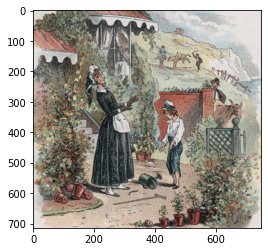

In [10]:
img_arr = read_img(origin_files[0])

# 파일 경로 출력
print(origin_files[0])

# 이미지 크기 출력
print(img_arr.shape)

# 이미지 시각화
plt.imshow(img_arr)

`original`폴더에는 714 x 750 크기의 `Victorian1.png` 이미지가 저장돼있는 것을 확인할 수 있습니다. 

resized/Victorian1.png
(256, 256, 3)


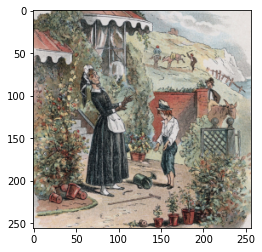

In [15]:
img_arr = read_img(resized_files[0])

# 파일 경로 출력
print(resized_files[0])

# 이미지 크기 출력
print(img_arr.shape)

# 이미지 시각화
plt.imshow(img_arr)

`resized`폴더에는 256 x 256 크기의 `Victorian1.png` 이미지가 저장돼있는 것을 확인할 수 있습니다. 

gray/Victorian1.png
(256, 256, 3)


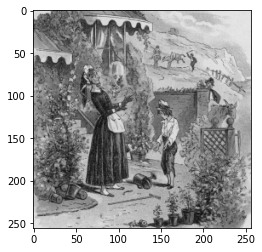

In [16]:
img_arr = read_img(gray_files[0])

# 파일 경로 출력
print(gray_files[0])

# 이미지 크기 출력
print(img_arr.shape)

# 이미지 시각화
plt.imshow(img_arr)

`gray`폴더에는 256 x 256 크기의 흑백 `Victorian1.png` 이미지가 저장돼있는 것을 확인할 수 있습니다. 

각 폴더에 저장돼 있는 이미지를 비교해보았습니다. 하지만 하나의 출력 셀에 하나의 이미지를 시각화 하다보니 여러 이미지를 비교하기가 제한적입니다. 그러므로 다음 절에서는 `plt.subplots()` 함수를 활용해 여러 이미지를 하나의 출력창에 출력해 비교해보겠습니다. 

## 2.3 plt.subplots()를 활용한 시각화

각 폴더에서 `img_num`개수 만큼에 이미지를 읽어서 `img_arrs`에 저장해 두겠습니다. 아래 코드를 활용해 `original`, `resized`, 그리고 `gray`폴더에서 각각 5개씩 이미지를 읽어 오도록 하겠습니다. 

In [17]:
img_arrs = []

img_num = 5

for idx in range(img_num):
    
    img_arrs.append(read_img(origin_files[idx]))
    img_arrs.append(read_img(resized_files[idx]))
    img_arrs.append(read_img(gray_files[idx]))

In [18]:
len(img_arrs)

15

3개의 폴더로 부터 각각 5개의 이미지를 읽었기 때문에 총 15개의 이미지가 `img_arrs`에 저장됐습니다. 

다음으로는 `plt.subplots()`함수를 활용해 15개의 이미지를 하나의 출력 창에 출력해보겠습니다. 해당 함수는 아래 3개의 파라미터를 입력값으로 받습니다. 

- `nrows`: 표출되는 이미지 판의 행 개수
- `ncols`: 표출되는 이미지 판의 열 개수
- `figsize`: 각 이미지들의 (가로, 세로) 크기

15개의 이미지가 `img_arrs`변수에 저장돼있으므로 5개의 행과 3개의 열을 가진 이미지 판 위에 이미지를 시각화해보겠습니다. 

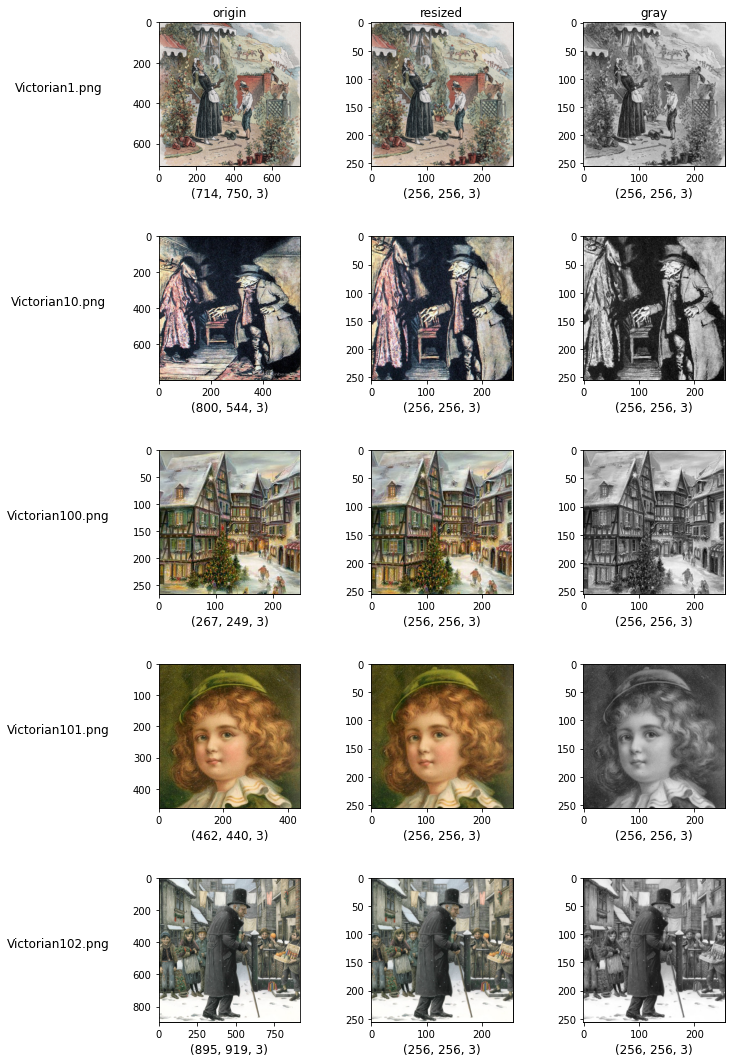

In [19]:
rows = img_num
columns = 3

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))

# 각 판에 이미지 출력
for num in range(1, rows*columns+1): # 1번 부터 15번 까지
    
    fig.add_subplot(rows, columns, num) # 원하는 위치 번호(num)를 입력
    
    idx = num - 1
    
    plt.imshow(img_arrs[idx], aspect='auto')
    plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # 이미지 사이 간격 조정

for file_idx, ax in enumerate(axes[:,0]): # 첫번째 열에 있는 이미지들에 대해 반복
    ax.set_ylabel(f'{sorted(os.listdir(origin_dir))[file_idx]}',  # 파일명을 y축 라벨로 사용
                rotation=0,
                fontsize=12,
                labelpad=100) # y축과 라벨사이의 간격 조정

cols = ['origin', 'resized', 'gray']

# 제목 설정
for folder_idx, ax in enumerate(axes[0]):
    ax.set_title(cols[folder_idx])

# xtick, ytick 제거
for idx, ax in enumerate(axes.flat):
    ax.set_xticks([])
    ax.set_yticks([])

코드를 하나씩 살펴보도록 하겠습니다. `plt.subplots()`함수는 격자로된 `nrows` x `ncols` 크기의 그림판을 생성합니다. 위 코드에서는 5개의 행과 3개의 열을 지닌 그림판을 생성했습니다. 각 격자에 속해있는 셀별로 고유 번호가 할당돼 있습니다. 해당 번호는 1번부터 15번(`nrows` x `ncols`)까지 존재합니다. 왼쪽부터 오른쪽, 그리고 위에서 아래로 번호가 할당 됩니다. 그림 2-4 처럼 첫번째 행의 왼쪽 셀부터 1번, 2번, 3번이 할당 되고 두번째 행의 왼쪽 셀부터 4번, 5번, 6번이 할당됩니다. 

![](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/GAN-ch2img04.PNG?raw=true)
- 그림 2.4 격자 셀별 부여된 번호

각 셀에 이미지를 추가하기 위해서는 `add_subplot()` 함수를 활용해 셀을 선택합니다. 그리고 `plt.show()`함수를 활용해 선택한 셀 위에 이미지를 시각화 합니다. 이 때 `aspect`파라미터를 `auto`로 설정해 이미지의 가로 세로 비율을 자동으로 조정해줍니다. 이와 더불어 `plt.xlabel()`함수를 활용해 이미지의 크기를 각각 x축에 표시합니다. 

다음으로 `fig.tight_layout()`함수를 활용해 이미지간의 간격을 조정합니다. 

출력된 격자 그림판의 행에는 각 이미지들이 담겨 있으며 각 열은 이미지들이 저장된 폴더를 뜻합니다. 해당 내용을 직관적으로 볼 수 있게 파일명과 폴더 명을 이미지와 함께 출력해보겠습니다. 

`axes`에는 15개 셀들의 이미지 정보가 담겨 있습니다. 첫번째 열에 저장된 이미지들만 선택해 y축 이름으로 해당 이미지의 파일 명을 기록하기 위해 `set_ylabel()`함수를 활용합니다. 또한 첫번째 행에 저장된 이미지만 선택해 이미지 제목으로 `original`, `resized`, 그리고 `gray`를 순서대로 입력합니다. 

마지막으로 각 이미지들의 `xticks`, `yticks`을 제거하여 최종적인 결과물을 출력합니다. 위 결과물을 통해 15개의 이미지를 하나의 출력창에서 비교할 수 있습니다. `original`폴더에는 컬러 이미지가 다양한 크기로 저장돼 있음을 알 수 있고 `resized`와 `gray`폴더에는 각각 256 x 256 크기의 이미지가 컬러와 흑백 형태로 저장돼 있음을 확인할 수 있습니다. 


## 2.4 이미지 전처리

이번 절에서는 이미지 전처리를 실시해보겠습니다. 400개의 `resized` 이미지와 `gray` 이미지들의 채널별 평균값과 표준편차 값을 구한 후 각 이미지 픽셀에 대해 평균값을 빼준 후 표준편차로 나눠줌으로써 정규화를 진행하겠습니다. 이론적으로 이미지에 정규화를 진행해주면 신경망 모델이 보다 더 빨리 수렴하게 해주는 효과가 있습니다. 전체 이미지들로 부터 평균값과 표준편차를 구하는 함수 `get_mean_and_std()`를 아래와 같이 정의하겠습니다.

In [24]:
import numpy as np

def get_mean_and_std(files):
    # global mean 구하기
    global_mean = 0
    global_var = 0

    for img in files:
        img_arr = read_img(img) / 255
        global_mean += img_arr.reshape(-1, 3).mean(axis=0)

    global_mean /= len(files)

    # global std 구하기
    for img in files:
        img_arr = read_img(img) / 255
        global_var += ((img_arr.reshape(-1, 3) - global_mean)**2).mean(axis=0)
    
    global_var /= len(files)
    global_std = np.sqrt(global_var)

    return global_mean, global_std

평균값과 표준편차값을 구하기 전에 픽셀값을 255로 나누어 픽셀값의 범위를 0부터 1사이로 변환시킨 후에 값을 구하도록 하겠습니다. 이렇게 하는 이유는 3장과 4장에서 `transforms.ToTensor()` 함수를 활용해 이미지들을 텐서 형태로 변환 시킬 예정인데, 이 때 `transforms.ToTensor()` 함수 특성 상 픽셀 값이 0과 1사이로 변환되기 때문입니다. 그러므로 픽셀값이 0과 1사이의 범위일 때의 평균값과 표준편차 값을 구해 추후 정규화에 사용할 수 있도록 하겠습니다. 

각 이미지별 평균값을 누적해서 더한 뒤 전체 이미지의 개수를 내포하는 `len(files)`로 나눠서 전체 이미지에 대한 평균값을 산출 합니다. 전체 이미지에 대한 표준편차를 구하기 위해 앞서 산출한 평균값을 픽셀값으로 부터 빼줌으로써 편차를 구하고, 해당 편차를 제곱한 값의 평균을 구해 전체 이미지 픽셀값에 대한 분산을 먼저 구합니다. 그리고 나서 분산에 루트를 씌워 표준편차를 구합니다. 

이렇게 정의한 `get_mean_and_std()`함수를 아래와 같이 활용해 컬러 이미지와 흑백 이미지에 대한 평균과 표준편차를 구할 수 있습니다. 

In [41]:
# 컬러 이미지 평균, 표준편차
color_mean, color_std = get_mean_and_std(resized_files)
color_mean, color_std

(array([0.58090717, 0.52688643, 0.45678478]),
 array([0.25644188, 0.25482641, 0.24456465]))

In [42]:
# 흑백 이미지 평균, 표준편차
gray_mean, gray_std = get_mean_and_std(gray_files)
gray_mean, gray_std

(array([0.5350533, 0.5350533, 0.5350533]),
 array([0.25051587, 0.25051587, 0.25051587]))

정규화 전과 후의 차이를 비교해보도록 하겠습니다. 먼저 새로운 이미지를 읽어서 255으로 나눠 픽셀 값을 0과 1사이로 변환해줍니다. 

In [51]:
color_img = read_img(resized_files[0]) / 255
gray_img = read_img(gray_files[0]) / 255

`RGB` 채널별 통곗값을 확인할 수 있게 `get_statistics` 함수를 정의하겠습니다. 해당 함수는 `RGB` 채널별 평균, 표준편차, 최솟값, 최댓값 등의 통곗값을 반환하는 함수입니다. `pandas` 라이브러리에서 제공하는 `pd.DataFrame.describe()` 함수를 활용해 간단하게 통곗값을 산출할 수 있습니다.

In [60]:
import pandas as pd

def get_statistics(arr):
    return pd.DataFrame(arr.reshape(-1, 3), columns=["R", "G", "B"]).describe()

`color_img`의 통곗값을 확인해보겠습니다.

In [59]:
get_statistics(color_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.564941,0.537205,0.493146
std,0.208751,0.203116,0.198431
min,0.027451,0.039216,0.058824
25%,0.411765,0.380392,0.333333
50%,0.584314,0.533333,0.478431
75%,0.745098,0.709804,0.650980
max,0.929412,0.913725,0.909804


최솟값, 최댓값이 0과 1사이에 분포해있는 것을 확인할 수 있습니다. 다음으로는 `gray_img`의 통곗값을 확인해보겠습니다.

In [61]:
get_statistics(gray_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.540488,0.540488,0.540488
std,0.201794,0.201794,0.201794
min,0.047059,0.047059,0.047059
25%,0.388235,0.388235,0.388235
50%,0.541176,0.541176,0.541176
75%,0.713725,0.713725,0.713725
max,0.917647,0.917647,0.917647


흑백 이미지이므로 모든 채널의 값이 같기 때문에 채널별 통곗값도 서로 같은 것을 확인할 수 있습니다. 다음으로는 `get_mean_and_std()` 함수를 통해 산출한 `color_mean`, `color_std`, `gray_mean`, `gray_std`로 정규화를 한 후 통곗값을 확인해보겠습니다. 정규화한 값을 `normalized_color_img`, `normalized_gray_img`에 각각 저장합니다. 

In [62]:
normalized_color_img = (color_img - color_mean) / color_std
normalized_gray_img = (gray_img - gray_mean) / gray_std

`get_statistics()`함수를 활용해 `normalized_color_img`의 `RGB` 채널별 통곗값을 산출해보겠습니다.

In [63]:
get_statistics(normalized_color_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,-0.062259,0.040491,0.148678
std,0.814030,0.797075,0.811364
min,-2.158213,-1.913737,-1.627223
25%,-0.659574,-0.574879,-0.504780
50%,0.013284,0.025299,0.088511
75%,0.640265,0.717812,0.794046
max,1.359000,1.518049,1.852349


정규화가 이뤄진 후에는 평균이 0에 가깝게, 표준편차는 1에 가깝게 변환된 것을 확인할 수 있습니다. 정확히 0과 1이 아닌 이유는 정규화할 때 사용한 평균과 표준편차는 하나의 이미지로 구한 값이 아닌, 전체 데이터셋을 활용해서 구한 값이기 때문입니다. 

In [64]:
get_statistics(normalized_gray_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.021694,0.021694,0.021694
std,0.805516,0.805516,0.805516
min,-1.947958,-1.947958,-1.947958
25%,-0.586063,-0.586063,-0.586063
50%,0.024442,0.024442,0.024442
75%,0.713217,0.713217,0.713217
max,1.527224,1.527224,1.527224


마찬가지로 `normalized_gray_img`도 평균은 0에, 표준편차는 1에 가깝게 변환이 됐습니다. 


지금까지 Victorian400 데이터셋에 저장된 이미지를 시각화 해보았습니다. 3장에서는 Victorian400 데이터셋을 활용해 흑백 이미지를 컬러 이미지로 변환하는 GAN 모델을 구축해보겠습니다. 